# Бондарев И. М., гр. 853501

In [2]:
import numpy as np
from matplotlib import pyplot as plt

from scipy.special import kolmogorov

from scipy import stats

In [3]:
n = 3
m = 3
X = [1, 2, 3]
Y = [1, 2, 3]
P = [[0.05, 0.1, 0.05],
     [0.05, 0.2, 0.05],
     [0.1, 0.3, 0.1]]

In [4]:
q = np.sum(P, axis=1)
l = np.cumsum(q)

def rand():
    rv_X = np.random.uniform()
    k = np.searchsorted(l, rv_X)
    r = np.cumsum(P[k]) / q[k]
    rv_Y = np.random.uniform()
    s = np.searchsorted(r, rv_Y)
    return X[k], Y[s]

In [5]:
rand()

(2, 2)

In [6]:
N = 10000
samples = [rand() for i in range(N)]

In [7]:
P_empirical = np.zeros((n, m))


for item in samples:
    P_empirical[item[0] - 1][item[1] - 1] += 1
    
P_empirical /= N

P_empirical


array([[0.05  , 0.0973, 0.0482],
       [0.0519, 0.197 , 0.0519],
       [0.1027, 0.303 , 0.098 ]])

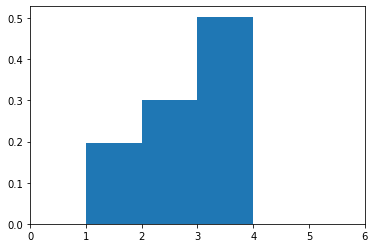

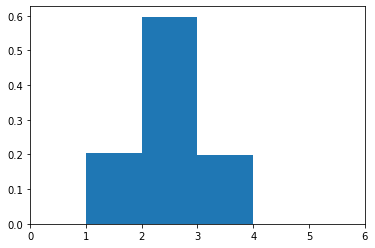

In [8]:
def plot_hist(points, weights):
    plt.hist(points, bins=list(points) + [points[-1] + 1], weights=weights, align='mid', histtype='stepfilled')
    plt.xlim(0, n + m)
    plt.show()

    
plot_hist(X, P_empirical.sum(axis=1))
plot_hist(Y, P_empirical.sum(axis=0))

In [9]:
P_x_t = np.sum(P, axis=1)
P_y_t = np.sum(P, axis=0)

M_x = 0
M_y = 0

for i in range(n):
    M_x += P_x_t[i] * X[i]
    
for j in range(m):
    M_y += P_y_t[j] * Y[j]

    
print(f'Theoretical M_x = {M_x}, M_y = {M_y}')

Theoretical M_x = 2.3, M_y = 2.0


In [10]:
def get_M_Emp(X):
    return X.mean()

def get_D_Emp(X):
    m_x = X.mean()
    return ((X - m_x) ** 2 / (len(X) - 1)).sum()

In [11]:
samples_X = np.array(np.squeeze(np.matrix(samples)[:, 0]))[0]
samples_Y = np.array(np.squeeze(np.matrix(samples)[:, 1]))[0]

M_x_e = get_M_Emp(samples_X)
M_y_e = get_M_Emp(samples_Y)

print(f'Empirical M_x = {M_x_e}, M_y = {M_y_e}')

Empirical M_x = 2.3082, M_y = 1.9935


In [12]:
D_x = 0
D_y = 0

for i in range(n):
    D_x += P_x_t[i] * (X[i] - M_x)**2
    
for j in range(m):
    D_y += P_y_t[j] * (Y[j] - M_y)**2
    

print(f'Theoretical D_x = {D_x}, D_y = {D_y}')
    


Theoretical D_x = 0.61, D_y = 0.4


In [13]:
D_x_e = get_D_Emp(samples_X)
D_y_e = get_D_Emp(samples_Y)

print(f'Empirical D_x = {D_x_e}, D_y = {D_y_e}')

Empirical D_x = 0.6042731873187317, D_y = 0.40269801980198006


In [14]:
def M_interval(M, D, n, p):
    alpha = 1 - p
    return M - stats.norm.ppf(1 - alpha / 2) * np.sqrt(D) / np.sqrt(n), M + stats.norm.ppf(1 - alpha / 2) * np.sqrt(D) / np.sqrt(n)

def D_interval(M, D, n, p):
    alpha = 1 - p
    return (n - 1) * D / stats.chi2(n - 1).ppf(1 - alpha / 2), (n - 1) * D / stats.chi2(n - 1).ppf(alpha / 2)

In [15]:
M_x_interval = M_interval(M_x_e, D_x_e, N, 0.95)
M_y_interval = M_interval(M_y_e, D_y_e, N, 0.95)

print(f'Interval: M_x = {M_x_interval}, Interval: M_y = {M_y_interval}')

Interval: M_x = (2.292964217888357, 2.3234357821116425), Interval: M_y = (1.981062364130413, 2.005937635869587)


In [16]:
D_x_interval = D_interval(M_x_e, D_x_e, N, 0.95)
D_y_interval = D_interval(M_y_e, D_y_e, N, 0.95)

print(f'Interval: D_x = {D_x_interval}, Interval: D_y = {D_y_interval}')

Interval: D_x = (0.5878667533755008, 0.6213794716600323), Interval: D_y = (0.391764490730027, 0.41409794118683846)


In [17]:
def get_R(X, M_x, Y, M_y, D_x, D_y):
    numerator = 0
    for i in range(N):
        numerator += (X[i] - M_x) * (Y[i] - M_y)
        
    return numerator / (np.sqrt(D_x * D_y * ((N - 1) ** 2)))

R = get_R(samples_X, M_x, samples_Y, M_y, D_x, D_y)
print(f'R = {R}')

R = -0.0019234111252874628


In [18]:
alpha = 0.05

s = len(P) * np.sum((P - P_empirical) ** 2 / P)
p_value = 1 - stats.chi2.cdf(s, len(P) - 1)

print(f'pValue = {p_value}, alpha = {alpha}, {p_value > alpha}')


pValue = 0.9992952484541099, alpha = 0.05, True
